=== 1. 데이터셋 이해 및 분석 ===

1.1 데이터 기본 정보
데이터 크기: (891, 15)

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

1.2 기술 

/var/folders/ln/kkrz5x5s3rq0k4s1f6vqd08c0000gn/T/ipykernel_85358/757833308.py:60: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/ln/kkrz5x5s3rq0k4s1f6vqd08c0000gn/T/ipykernel_85358/757833308.py:60: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/ln/kkrz5x5s3rq0k4s1f6vqd08c0000gn/T/ipykernel_85358/757833308.py:60: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/ln/kkrz5x5s3rq0k4s1f6vqd08c0000gn/T/ipykernel_85358/757833308.py:60: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/ln/kkrz5x5s3rq0k4s1f6vqd08c0000gn/T/ipykernel_85358/757833308.py:60: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/ln/kkrz5x5s3rq0k4s1f6vqd08c0000gn/T/ipykerne

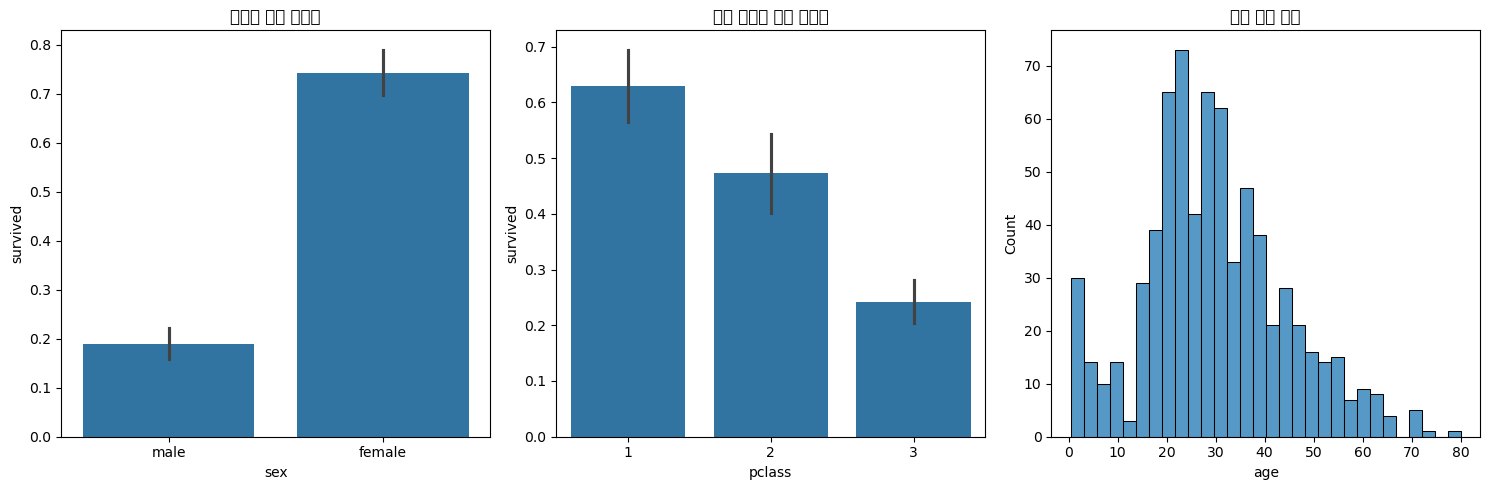


=== 2. Feature Engineering ===

2.1 결측치 처리

2.2 범주형 변수 인코딩

2.3 새로운 특성 생성

선택된 특성: ['pclass', 'sex', 'age', 'fare', 'embarked', 'family_size']

=== 3. 모델 학습 및 비교 ===

Logistic Regression 모델 평가:
테스트 정확도: 0.8045
교차 검증 정확도: 0.7963 (+/- 0.0619)

분류 보고서:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179


Decision Tree 모델 평가:
테스트 정확도: 0.7709
교차 검증 정확도: 0.7641 (+/- 0.0459)

분류 보고서:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       105
           1       0.71      0.76      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.77      0.77      0.77       179


Random Forest 모델

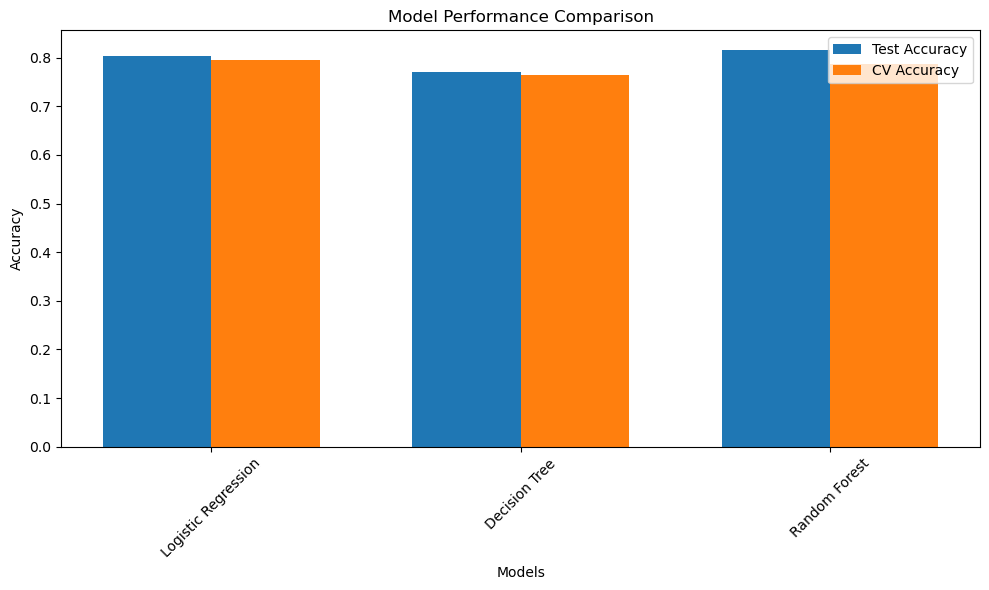


4.1 최적 모델
최적 모델: Logistic Regression
검증 정확도: 0.7963


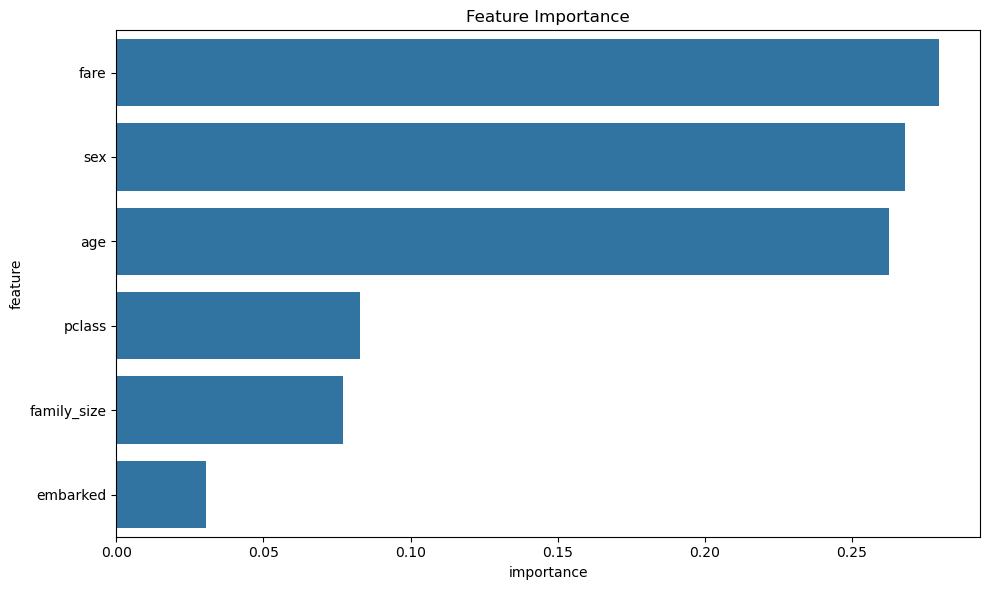


4.2 주요 결론
1) 모델 성능 비교
   - Logistic Regression: 0.8045 (테스트) / 0.7963 (교차 검증)
   - Decision Tree: 0.7709 (테스트) / 0.7641 (교차 검증)
   - Random Forest: 0.8156 (테스트) / 0.7866 (교차 검증)

2) 중요 특성 (상위 3개)
   - fare: 0.2795
   - sex: 0.2680
   - age: 0.2626

3) 개선 가능성
   - 특성 선택 최적화
   - 하이퍼파라미터 튜닝
   - 앙상블 기법 적용


In [25]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. 데이터셋 이해 및 분석
def load_and_analyze_data():
    """
    타이타닉 데이터셋을 로드하고 기초 분석을 수행합니다.
    """
    # 데이터 로드
    titanic = sns.load_dataset('titanic')
    
    print("=== 1. 데이터셋 이해 및 분석 ===")
    
    # 1.1 데이터 기본 정보
    print("\n1.1 데이터 기본 정보")
    print(f"데이터 크기: {titanic.shape}")
    print("\n데이터 정보:")
    print(titanic.info())
    
    # 1.2 기술 통계량
    print("\n1.2 기술 통계량")
    print(titanic.describe())
    
    # 1.3 결측치 분석
    print("\n1.3 결측치 현황")
    missing_data = titanic.isnull().sum()
    print(missing_data[missing_data > 0])
    
    # 1.4 생존율 분석
    print("\n1.4 전체 생존율")
    survival_rate = titanic['survived'].mean() * 100
    print(f"전체 생존율: {survival_rate:.2f}%")
    
    # 1.5 시각화
    plt.figure(figsize=(15, 5))
    
    # 성별에 따른 생존율
    plt.subplot(131)
    sns.barplot(x='sex', y='survived', data=titanic)
    plt.title('성별에 따른 생존율')
    
    # 객실 등급에 따른 생존율
    plt.subplot(132)
    sns.barplot(x='pclass', y='survived', data=titanic)
    plt.title('객실 등급에 따른 생존율')
    
    # 나이 분포
    plt.subplot(133)
    sns.histplot(data=titanic, x='age', bins=30)
    plt.title('승객 나이 분포')
    
    plt.tight_layout()
    plt.show()
    
    return titanic

# 2. Feature Engineering
def perform_feature_engineering(data):
    """
    특성 공학을 수행하여 데이터를 전처리합니다.
    """
    print("\n=== 2. Feature Engineering ===")
    
    # 2.1 결측치 처리
    print("\n2.1 결측치 처리")
    data['age'] = data['age'].fillna(data['age'].median())
    data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])
    
    # 2.2 범주형 변수 인코딩
    print("\n2.2 범주형 변수 인코딩")
    data['sex'] = data['sex'].map({'male': 0, 'female': 1})
    data['embarked'] = data['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
    
    # 2.3 새로운 특성 생성
    print("\n2.3 새로운 특성 생성")
    # 가족 크기
    data['family_size'] = data['sibsp'] + data['parch'] + 1
    # 요금 구간화
    data['fare_bin'] = pd.qcut(data['fare'], 4, labels=['low', 'medium', 'high', 'very_high'])
    # 나이 구간화
    data['age_bin'] = pd.cut(data['age'], bins=[0, 12, 20, 40, 60, 100], 
                            labels=['child', 'teenage', 'adult', 'middle_aged', 'elderly'])
    
    # 2.4 최종 특성 선택
    features = ['pclass', 'sex', 'age', 'fare', 'embarked', 'family_size']
    X = data[features]
    y = data['survived']
    
    print("\n선택된 특성:", features)
    
    return X, y

# 3. 모델 학습 및 비교
def train_and_compare_models(X, y):
    """
    여러 모델을 학습하고 성능을 비교합니다.
    """
    print("\n=== 3. 모델 학습 및 비교 ===")
    
    # 3.1 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 3.2 데이터 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 3.3 모델 정의
    models = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42)
    }
    
    # 3.4 모델 학습 및 평가
    results = {}
    for name, model in models.items():
        print(f"\n{name} 모델 평가:")
        
        # 모델 학습
        model.fit(X_train_scaled, y_train)
        
        # 예측
        y_pred = model.predict(X_test_scaled)
        
        # 성능 평가
        accuracy = accuracy_score(y_test, y_pred)
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
        
        results[name] = {
            'accuracy': accuracy,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'report': classification_report(y_test, y_pred)
        }
        
        print(f"테스트 정확도: {accuracy:.4f}")
        print(f"교차 검증 정확도: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
        print("\n분류 보고서:")
        print(results[name]['report'])
    
    return results

# 4. 최종 성능 평가 및 결론
def evaluate_and_conclude(results, X):
    """
    최종 성능을 평가하고 결론을 도출합니다.
    """
    print("\n=== 4. 최종 성능 평가 및 결론 ===")
    
    # 4.1 모델 성능 비교 시각화
    plt.figure(figsize=(10, 6))
    accuracies = [v['accuracy'] for v in results.values()]
    cv_means = [v['cv_mean'] for v in results.values()]
    
    x = np.arange(len(results))
    width = 0.35
    
    plt.bar(x - width/2, accuracies, width, label='Test Accuracy')
    plt.bar(x + width/2, cv_means, width, label='CV Accuracy')
    
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Performance Comparison')
    plt.xticks(x, results.keys(), rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # 4.2 최적 모델 선정
    best_model = max(results.items(), key=lambda x: x[1]['cv_mean'])
    print("\n4.1 최적 모델")
    print(f"최적 모델: {best_model[0]}")
    print(f"검증 정확도: {best_model[1]['cv_mean']:.4f}")
    
    # 4.3 특성 중요도 분석 (Random Forest 기준)
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X, y)
    
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()
    
    # 4.4 결론 도출
    print("\n4.2 주요 결론")
    print("1) 모델 성능 비교")
    for name, metrics in results.items():
        print(f"   - {name}: {metrics['accuracy']:.4f} (테스트) / {metrics['cv_mean']:.4f} (교차 검증)")
    
    print("\n2) 중요 특성 (상위 3개)")
    for _, row in feature_importance.head(3).iterrows():
        print(f"   - {row['feature']}: {row['importance']:.4f}")
    
    print("\n3) 개선 가능성")
    print("   - 특성 선택 최적화")
    print("   - 하이퍼파라미터 튜닝")
    print("   - 앙상블 기법 적용")

# 메인 실행
if __name__ == "__main__":
    # 1. 데이터 로드 및 분석
    titanic = load_and_analyze_data()
    
    # 2. Feature Engineering
    X, y = perform_feature_engineering(titanic)
    
    # 3. 모델 학습 및 비교
    results = train_and_compare_models(X, y)
    
    # 4. 최종 평가 및 결론
    evaluate_and_conclude(results, X)